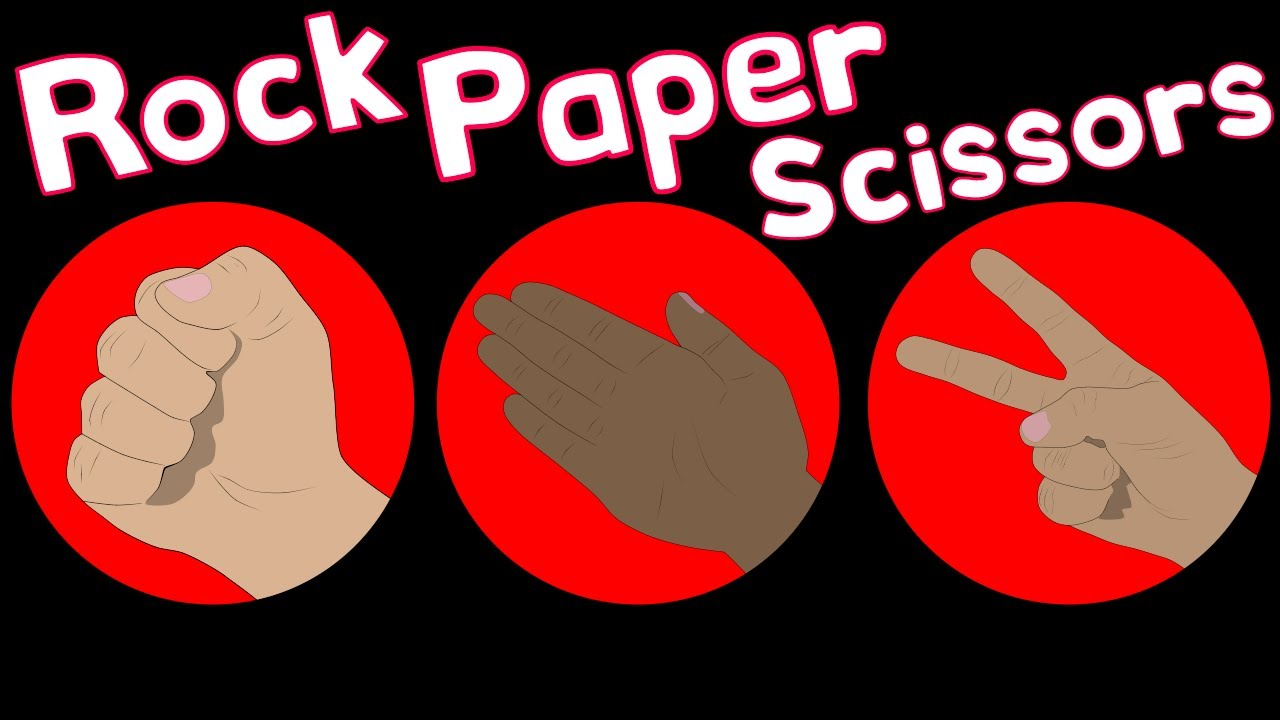

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
Dir_path = os.path.join('/content/drive/MyDrive/CV_intern/Rock_paper_scissor/Rock-Paper-Scissors-3')

In [10]:
Train_path = os.path.join('/content/drive/MyDrive/CV_intern/Rock_paper_scissor/Rock-Paper-Scissors-3/train_data')
Test_path = os.path.join('/content/drive/MyDrive/CV_intern/Rock_paper_scissor/Rock-Paper-Scissors-3/test_data')

In [11]:
Train_path

'/content/drive/MyDrive/CV_intern/Rock_paper_scissor/Rock-Paper-Scissors-3/train_data'

In [12]:
Img_size = 128,
Channels = 3,
Input_shape = Img_size,Img_size,Channels

In [13]:
datagen = ImageDataGenerator(
    rotation_range = 360,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    rescale = 1./255
)

In [14]:
train_generator = datagen.flow_from_directory(
    Train_path,
    target_size = (128,128),
    class_mode = 'categorical',
    batch_size = 100,
    shuffle = True
)
val_generator = datagen.flow_from_directory(
    Test_path,
    target_size = (128,128),
    class_mode = 'categorical',
    batch_size = 100,
    shuffle = True
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [15]:
vgg16 = VGG16(include_top=False,weights='imagenet',input_shape = [128,128,3])

for layer in vgg16.layers:
  layer.trainable = False

58892288/58889256 [==============================] - 0s 0us/step


In [16]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [17]:
from keras.models import Sequential
model = Sequential()

In [18]:
model.add(vgg16)
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dense(3,activation='softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               3

In [20]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [22]:
Batch_size = 100
result = model.fit_generator(train_generator,
                    epochs = 10,
                    steps_per_epoch = train_generator.samples//Batch_size,
                    validation_data = val_generator,
                    validation_steps = val_generator.samples//Batch_size)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
25/25 [==============================] - 21s 833ms/step - loss: 0.0498 - accuracy: 0.9810 - val_loss: 0.0952 - val_accuracy: 0.9700
Epoch 2/10
25/25 [==============================] - 20s 806ms/step - loss: 0.0146 - accuracy: 0.9946 - val_loss: 0.2243 - val_accuracy: 0.9300
Epoch 3/10
25/25 [==============================] - 20s 808ms/step - loss: 0.0170 - accuracy: 0.9930 - val_loss: 0.3268 - val_accuracy: 0.9233
Epoch 4/10
25/25 [==============================] - 20s 811ms/step - loss: 0.0211 - accuracy: 0.9928 - val_loss: 0.6179 - val_accuracy: 0.8367
Epoch 5/10
25/25 [==============================] - 20s 801ms/step - loss: 0.0663 - accuracy: 0.9785 - val_loss: 0.0978 - val_accuracy: 0.9667
Epoch 6/10
25/25 [==============================] - 20s 799ms/step - loss: 0.0188 - accuracy: 0.9930 - val_loss: 0.3355 - val_accuracy: 0.9233
Epoch 7/10
25/25 [==============================] - 20s 797ms/step - loss: 0.0219 - accuracy: 0.9946 - val_loss: 0.2450 - val_accuracy: 0.9400

In [23]:
r = result.history

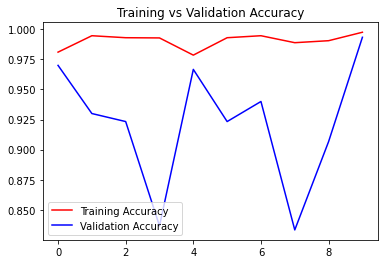

In [24]:
plt.plot(r['accuracy'],'r',label = 'Training Accuracy')
plt.plot(r['val_accuracy'],'b',label = 'Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

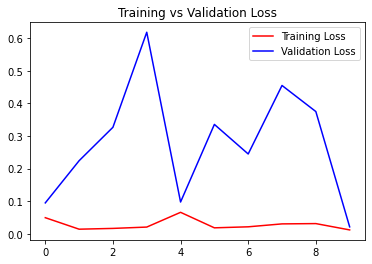

In [25]:
plt.plot(r['loss'],'r',label = 'Training Loss')
plt.plot(r['val_loss'],'b',label = 'Validation Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [26]:
print("Accuracy =",round(max(r['accuracy']),2))
print("Validation accuracy =",round(max(r['val_accuracy']),2))

Accuracy = 1.0
Validation accuracy = 0.99
